In [1]:
cd matlab
pwd
clear all
imatlab_export_fig('print-svg')  % Static svg figures.
format compact

ans =
    '/Users/eechris/code/src/github.com/cpjobling/eglm03-textbook/04/1/matlab'


In [2]:
G = zpk([],[-1;-2;-3],6)


G =


          6


  -----------------


  (s+1) (s+2) (s+3)


Continuous-time zero/pole/gain model.



In [3]:
H=1; 

In [4]:
GH=G*H;

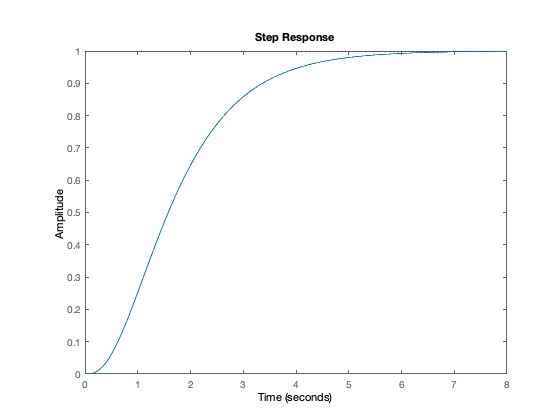

In [5]:
step(GH)  

In [6]:
Ts = 4.95; 

In [7]:
T = Ts/4; 

In [8]:
cmin = 0; tmin = 0.42; 

In [9]:
cmax=1; tmax = 2.674;

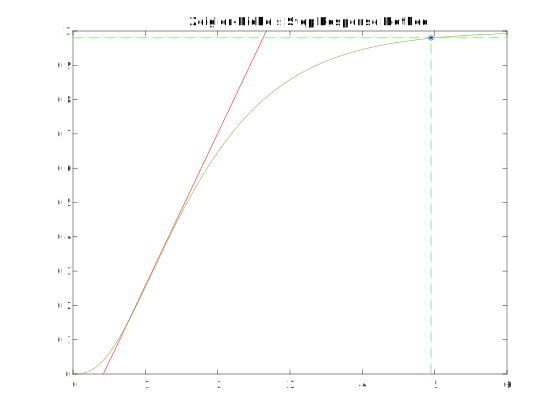

In [10]:
[c,t]=step(GH,6);
plot([tmin,tmax],[cmin,cmax],'r-'),axis([0,6,0,1]),hold on,...
plot([0,6],[0.98,0.98],'g--',[Ts,Ts],[0,0.98],'g--',[Ts],[0.98],'b*'),...
title('Zeigler-Nichols Step Response Method'),plot(t,c),hold off  

In [11]:
R = (cmax-cmin)/(tmax-tmin)  

R =
    0.4437


In [12]:
L = tmin;
L/T 

ans =
    0.3394


In [13]:
a=R*L;   

In [14]:
Kprop = 1.2/a; Ti = 2*L; Td = 0.5*L;  

In [15]:
Prop = tf(1,1);
Integ = tf(1,[Ti,0]);
Deriv = tf([Td,0],1);
PID1 = Kprop*(Prop + Integ + Deriv)  


PID1 =


  1.136 s^2 + 5.41 s + 6.44


  -------------------------


           0.84 s


Continuous-time transfer function.



In [16]:
PID1z = zpk(PID1) 


PID1z =


  1.3524 (s+2.381)^2


  ------------------


          s


Continuous-time zero/pole/gain model.



In [17]:
Gc1 = feedback(PID1*G,H);
[poles,zeros,gain]=zpkdata(Gc1,'v');  

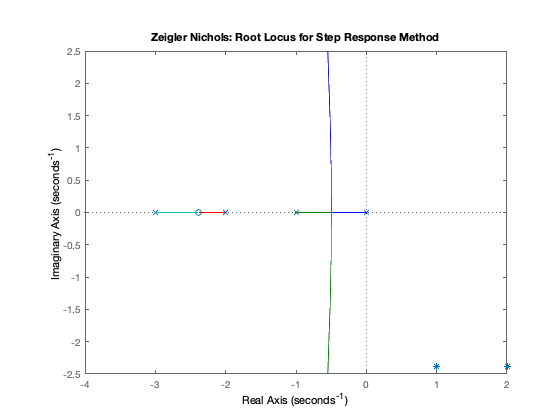

In [18]:
rlocus(PID1*GH),hold on,plot(poles,'*'),...
    title('Zeigler Nichols: Root Locus for Step Response Method'),hold off  

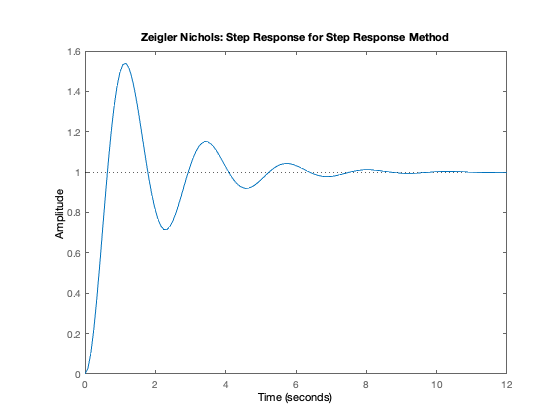

In [19]:
step(Gc1),title('Zeigler Nichols: Step Response for Step Response Method')  

In [20]:
Ku = 10; Tu = 2*pi/sqrt(11);  

In [21]:
Kp = dcgain(GH)
Kp*Ku  

Kp =
     1


ans =
    10


In [22]:
Kprop = 0.6*Ku; Ti = Tu/2; Td = Tu/8;  

In [23]:
Prop = tf(1,1);
Integ = tf(1,[Ti,0]);
Deriv = tf([Td,0],1);
PID2 = Kprop*(Prop + Integ + Deriv)  
PID2z = zpk(PID2)  


PID2 =


  1.346 s^2 + 5.683 s + 6


  -----------------------


         0.9472 s


Continuous-time transfer function.




PID2z =


  1.4208 (s+2.111)^2


  ------------------


          s


Continuous-time zero/pole/gain model.



In [24]:
Gc2 = feedback(PID2*G,H);
[poles,zeros,gain]=zpkdata(Gc2,'v');  

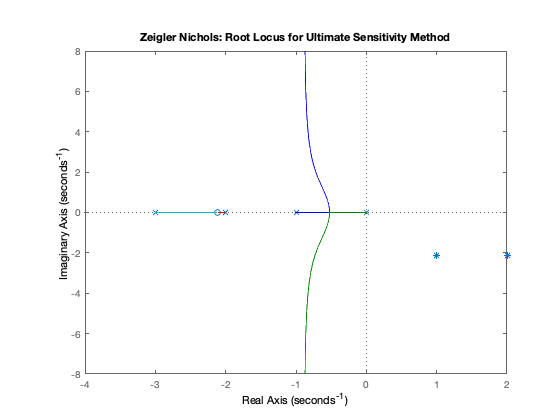

In [25]:
rlocus(PID2*GH),hold on,...
    plot(poles,'*'),...
    title('Zeigler Nichols: Root Locus for Ultimate Sensitivity Method'),hold off  

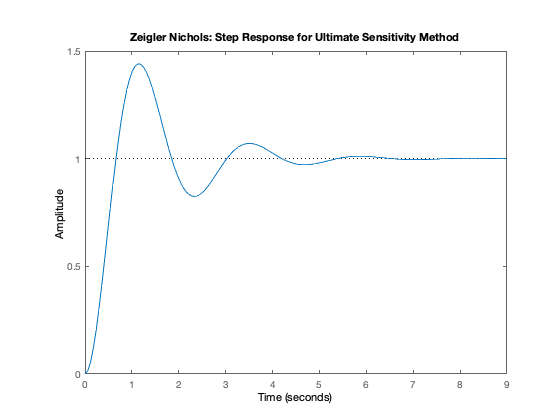

In [26]:
step(Gc2),title('Zeigler Nichols: Step Response for Ultimate Sensitivity Method')  

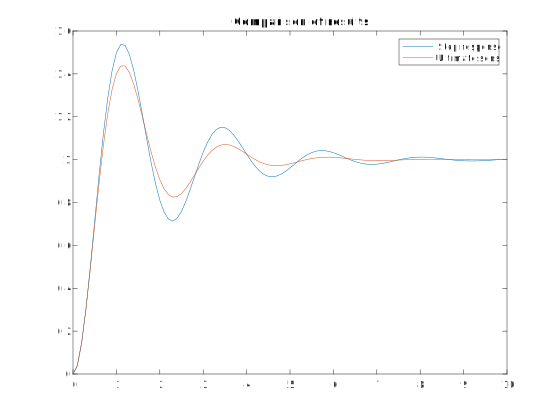

In [27]:
[y1,t1]=step(Gc1,10);
[y2,t2]=step(Gc2,10);
plot(t1,y1,t2,y2),legend('Step response','Ultimate sens.'),...
    title('Comparison of results')  